In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import glob
from pyspark.sql.types import IntegerType, FloatType
from pyspark.sql import SparkSession, DataFrame
import pyspark.sql.functions as F
import findspark
from pyspark.sql.functions import when
from openpyxl import Workbook

In [3]:
findspark.init()
findspark.find()

'C:\\Spark\\spark-3.0.3-bin-hadoop2.7'

In [4]:
spark = SparkSession \
.builder \
.appName("Practice") \
.config("spark.some.config.option", "some-value") \
.getOrCreate()

In [128]:
df = spark.read.csv(".\data\practive pyspark.csv", header =True)
df.show(5)
df.printSchema()

+----+--------+------+---+---------+--------------+---------+-------+------------+-----------+------------+------+------------+-----------+-------------+--------------------+-----------------+-----------------+----------+------------------+-----------------+--------------------+-----------------+
|Code|    area|gender|age|age_group|year_of_school|   degree|    job|know_english|know_france|know_chinese|income|booking_date|flight_date|flight_status|professionally_staff|customer_service |diversity_product|good_price|easily_transaction|goodlooking_staff|diversity_flighttime|good_construction|
+----+--------+------+---+---------+--------------+---------+-------+------------+-----------+------------+------+------------+-----------+-------------+--------------------+-----------------+-----------------+----------+------------------+-----------------+--------------------+-----------------+
|   1| central|female| 69|   middle|            16|   master|manager|           1|          1|           1

# Clean Data

In [129]:
#Convering str to numberic
df = df.withColumn('Code', F.col('Code').cast(IntegerType()))\
        .withColumn('age', F.col('age').cast(FloatType()))\
        .withColumn('year_of_school',F.col('year_of_school').cast(IntegerType()))\
        .withColumn('know_english', F.col('know_english').cast(IntegerType()))\
        .withColumn('know_france', F.col('know_france').cast(IntegerType()))\
        .withColumn('know_chinese', F.col('know_chinese').cast(IntegerType()))\
        .withColumn('income', F.col('income').cast(FloatType()))\
        .withColumn('flight_status', F.col('flight_status').cast(IntegerType()))\
        .withColumn('professionally_staff', F.col('professionally_staff').cast(IntegerType()))\
        .withColumn('customer_service ', F.col('customer_service ').cast(IntegerType()))\
        .withColumn('diversity_product', F.col('diversity_product').cast(IntegerType()))\
        .withColumn('good_price', F.col('good_price').cast(IntegerType()))\
        .withColumn('easily_transaction', F.col('easily_transaction').cast(IntegerType()))\
        .withColumn('goodlooking_staff', F.col('goodlooking_staff').cast(IntegerType()))\
        .withColumn('diversity_flighttime', F.col('diversity_flighttime').cast(IntegerType()))\
        .withColumn('good_construction', F.col('good_construction').cast(IntegerType()))
df.printSchema()

root
 |-- Code: integer (nullable = true)
 |-- area: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: float (nullable = true)
 |-- age_group: string (nullable = true)
 |-- year_of_school: integer (nullable = true)
 |-- degree: string (nullable = true)
 |-- job: string (nullable = true)
 |-- know_english: integer (nullable = true)
 |-- know_france: integer (nullable = true)
 |-- know_chinese: integer (nullable = true)
 |-- income: float (nullable = true)
 |-- booking_date: string (nullable = true)
 |-- flight_date: string (nullable = true)
 |-- flight_status: integer (nullable = true)
 |-- professionally_staff: integer (nullable = true)
 |-- customer_service : integer (nullable = true)
 |-- diversity_product: integer (nullable = true)
 |-- good_price: integer (nullable = true)
 |-- easily_transaction: integer (nullable = true)
 |-- goodlooking_staff: integer (nullable = true)
 |-- diversity_flighttime: integer (nullable = true)
 |-- good_construction: integer (nu

In [130]:
ppandas = df.toPandas()
ppandas.head()

,Code,area,gender,age,age_group,year_of_school,degree,job,know_english,know_france,...,flight_date,flight_status,professionally_staff,customer_service,diversity_product,good_price,easily_transaction,goodlooking_staff,diversity_flighttime,good_construction
0,1,central,female,69.0,middle,16,master,manager,1,1,...,01/05/2013,1,2,2,1,1,2,2,1,1
1,2,southern,female,50.0,middle,12,highshool,officer,0,0,...,01/05/2013,1,3,3,3,2,3,3,2,3
2,3,northern,male,73.0,elder,12,highshool,officer,1,0,...,01/05/2013,1,2,2,1,2,3,5,1,1
3,4,northern,female,73.0,elder,12,highshool,officer,0,0,...,01/05/2013,1,5,3,2,4,5,3,2,2
4,5,central,male,69.0,middle,16,master,officer,1,0,...,01/05/2013,0,3,3,3,3,3,3,3,3


# Bài 1 thu nhập trung bình? mốt và trung vị về thu nhập

In [131]:
print("tthu nhập trung bình, mốt và trung vị về thu nhập là:")
df.describe(['income']).show()

tthu nhập trung bình, mốt và trung vị về thu nhập là:
+-------+----------------+
|summary|          income|
+-------+----------------+
|  count|             500|
|   mean|        13859.62|
| stddev|7144.29879569467|
|    min|          6300.0|
|    max|         54000.0|
+-------+----------------+



In [132]:
#PySpark SQL Tutorial
df.createOrReplaceTempView("practice_pyspark")
df2 = spark.sql("SELECT * from practice_pyspark")

In [133]:
print("Mode là: ")
mode = spark.sql("SELECT income, count(income) as frequence FROM practice_pyspark GROUP by income order by frequence DESC LIMIT 1 ")
mode.show()

Mode là: 
+-------+---------+
| income|frequence|
+-------+---------+
|12300.0|       13|
+-------+---------+



<AxesSubplot:ylabel='income'>

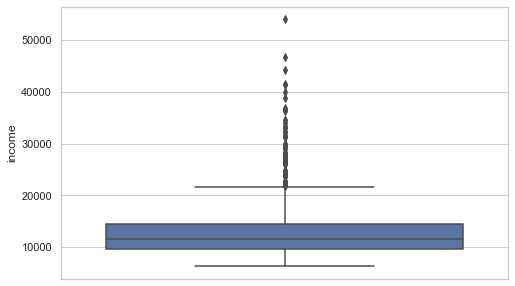

In [156]:
plt.subplots(figsize = (8,5))
sns.set_theme(style="whitegrid")
sns.boxplot(y=ppandas["income"])

# Bài 2. thu nhập trung bình từng khu vực

In [134]:
avgincome = spark.sql("SELECT area, Avg(income) as income from practice_pyspark group by area ")
avgincome.show()

+--------+------------------+
|    area|            income|
+--------+------------------+
| central| 19586.09661835749|
|southern| 8209.814814814816|
|northern|10750.421621621621|
+--------+------------------+



In [157]:
avgincome = avgincome.toPandas()

<AxesSubplot:xlabel='area', ylabel='income'>

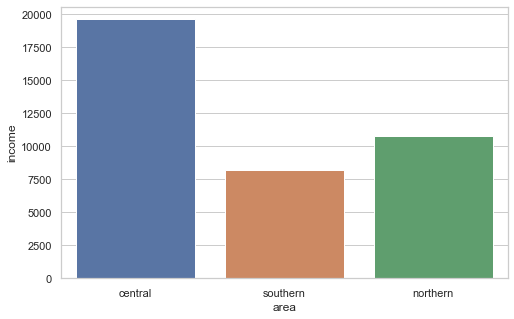

In [162]:
plt.subplots(figsize = (8,5))
sns.barplot(x = avgincome['area'], y = avgincome['income'])

# Bài 3. số năm đi học tb đối với kh nam và là nv kinh doanh

In [172]:
avgyear = spark.sql("SELECT gender,avg(year_of_school) as tb_so_nam_di_hoc from practice_pyspark where (gender = 'female' and job = 'sale') group by gender")
avgyear.show()

+------+-----------------+
|gender| tb_so_nam_di_hoc|
+------+-----------------+
|female|12.92079207920792|
+------+-----------------+



In [173]:
avgyear = avgyear.toPandas()

<AxesSubplot:xlabel='gender', ylabel='tb_so_nam_di_hoc'>

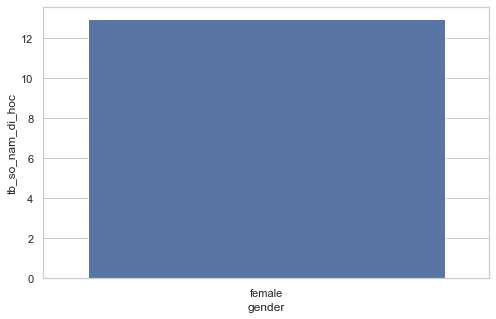

In [180]:
plt.subplots(figsize = (8,5))
sns.barplot(x = avgyear['gender'], y = avgyear['tb_so_nam_di_hoc'])

# bài 4. tuổi tb kh nữ sống ở miền nam và miền trung

In [136]:
avgage = spark.sql("SELECT area, avg(age) as avg_age from practice_pyspark where (gender = 'female'  and (area = 'northern' or area = 'central'))  group by area")
avgage.show()

+--------+------------------+
|    area|           avg_age|
+--------+------------------+
| central|62.794871794871796|
|northern| 62.96808510638298|
+--------+------------------+



In [175]:
avgage = avgage.toPandas()

<AxesSubplot:xlabel='avg_age', ylabel='area'>

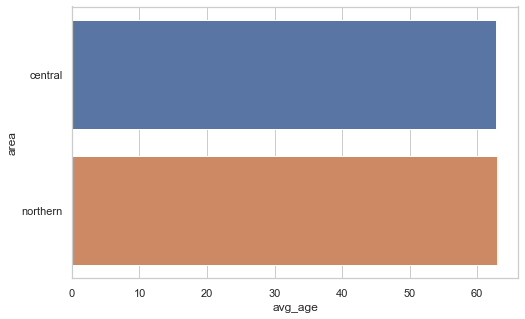

In [178]:
plt.subplots(figsize = (8,5))
sns.barplot(y = avgage['area'], x = avgage['avg_age'])

# Bài 5. tuổi tb cho 30% kh có tuổi thấp nhất

In [137]:
count = spark.sql("SELECT Count(*) from practice_pyspark")
count.show()

+--------+
|count(1)|
+--------+
|     500|
+--------+



In [138]:
#30% 500*30% = 150

In [139]:
avgage30 = spark.sql("SELECT avg(age)  from practice_pyspark Where age in (SELECT age from practice_pyspark ORDER BY age ASC LIMIT 150 )")
avgage30.show()

+-----------------+
|         avg(age)|
+-----------------+
|43.85806451612903|
+-----------------+



# Bài 6. thu nhập tb cho 20% có tuổi thấp nhất

In [140]:
avgage30 = spark.sql("SELECT avg(age)  from practice_pyspark Where age in (SELECT age from practice_pyspark ORDER BY age ASC LIMIT 150 )")
avgage30.show()

+-----------------+
|         avg(age)|
+-----------------+
|43.85806451612903|
+-----------------+



# Bài 7: số năm đi học tb cho 10% kh có thu nhập cao nhất

In [141]:
avgyear = spark.sql("SELECT avg(year_of_school)  from practice_pyspark Where income in (SELECT income from practice_pyspark ORDER BY age DESC LIMIT 50 )")
avgyear.show()

+-------------------+
|avg(year_of_school)|
+-------------------+
| 12.154929577464788|
+-------------------+



# Bài 8 lập bảng thống kê số lượng khách hàng, tỷ trọng theo từng trình độ

In [143]:
from pyspark.sql.types import StructType,StructField, StringType, IntegerType
emptyRDD = spark.sparkContext.emptyRDD()
schema = StructType([ \
    StructField("Code",StringType(),True), \
    StructField("KnowE",StringType(),True), \
    StructField("KnowF",StringType(),True), \
    StructField("KnowC", StringType(), True), \
  ])
 
df1 = spark.createDataFrame(emptyRDD,schema)
df1.printSchema()

root
 |-- Code: string (nullable = true)
 |-- KnowE: string (nullable = true)
 |-- KnowF: string (nullable = true)
 |-- KnowC: string (nullable = true)



In [148]:
df1.createOrReplaceTempView("Table_Stast")
df3 = spark.sql("SELECT * from Table_Stast")
df3.show()

+----+-----+-----+-----+
|Code|KnowE|KnowF|KnowC|
+----+-----+-----+-----+
+----+-----+-----+-----+



In [250]:
data = {'Title':['Số lượng', 'Tỷ trọng'],
    'Chỉ biết tiếng anh':[len(ppandas.loc[(ppandas['know_english'] == 1) & (ppandas['know_france']==0) & (ppandas['know_chinese']==0)]),len(ppandas.loc[(ppandas['know_english'] == 1) & (ppandas['know_france']==0) & (ppandas['know_chinese']==0)])/500],
       'Chỉ biết tiếng pháp': [len(ppandas.loc[(ppandas['know_english'] == 0) & (ppandas['know_france']==1) & (ppandas['know_chinese']==0)]),len(ppandas.loc[(ppandas['know_english'] == 0) & (ppandas['know_france']==1) & (ppandas['know_chinese']==0)])/500],
       'Chỉ biết tiếng Trung Quốc': [len(ppandas.loc[(ppandas['know_english'] == 0) & (ppandas['know_france']==0) & (ppandas['know_chinese']==1)]),len(ppandas.loc[(ppandas['know_english'] == 0) & (ppandas['know_france']==0) & (ppandas['know_chinese']==1)])/500],
       'Biết Tiếng anh và Tiếng Pháp':[len(ppandas.loc[(ppandas['know_english'] == 1) & (ppandas['know_france']==1) & (ppandas['know_chinese']==0)]),len(ppandas.loc[(ppandas['know_english'] == 1) & (ppandas['know_france']==1) & (ppandas['know_chinese']==0)])/500],
       'Biết Tiếng anh và Tiếng Trung Quốc':[len(ppandas.loc[(ppandas['know_english'] == 1) & (ppandas['know_france']==0) & (ppandas['know_chinese']==1)]),len(ppandas.loc[(ppandas['know_english'] == 1) & (ppandas['know_france']==0) & (ppandas['know_chinese']==1)])/500],
       'Biết Tiếng Pháp và Tiếng Trung Quốc':[len(ppandas.loc[(ppandas['know_english'] == 0) & (ppandas['know_france']==1) & (ppandas['know_chinese']==1)]),len(ppandas.loc[(ppandas['know_english'] == 0) & (ppandas['know_france']==1) & (ppandas['know_chinese']==1)])/500],
       "Biết cả 3 ngôn ngữ":[len(ppandas.loc[(ppandas['know_english'] == 1) & (ppandas['know_france']==1) & (ppandas['know_chinese']==1)]),len(ppandas.loc[(ppandas['know_english'] == 1) & (ppandas['know_france']==1) & (ppandas['know_chinese']==1)])/500],
       "Không biết ngôn ngữ nào": [len(ppandas.loc[(ppandas['know_english'] == 0) & (ppandas['know_france']==0) & (ppandas['know_chinese']==0)]),len(ppandas.loc[(ppandas['know_english'] == 0) & (ppandas['know_france']==0) & (ppandas['know_chinese']==0)])/500]}

In [261]:
table_statistic1 = pd.DataFrame(data)
table_statistic1

,Title,Chỉ biết tiếng anh,Chỉ biết tiếng pháp,Chỉ biết tiếng Trung Quốc,Biết Tiếng anh và Tiếng Pháp,Biết Tiếng anh và Tiếng Trung Quốc,Biết Tiếng Pháp và Tiếng Trung Quốc,Biết cả 3 ngôn ngữ,Không biết ngôn ngữ nào
0,Số lượng,160.00,17.000,19.000,34.000,31.000,0.0,16.000,223.000
1,Tỷ trọng,0.32,0.034,0.038,0.068,0.062,0.0,0.032,0.446


In [262]:
table_statistic1.set_index('Title',inplace =True)

In [226]:
#Check xem đủ 500 không
table_statistic1.sum(axis = 1)

Số lượng    500.0
Tỷ trọng      1.0
dtype: float64

In [273]:
dff = table_statistic1.T

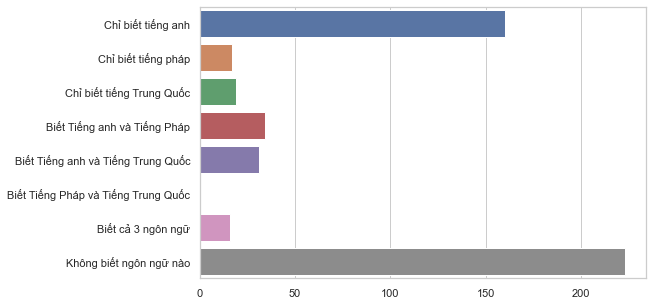

In [283]:
plt.subplots(figsize = (8,5))
ax = sns.barplot(data=d, y=dff['Số lượng'].index, x=dff['Số lượng'].values)

# Bài 9: lập bảng thống kê số lượng kh, tỷ trọng theo nhóm tuổi và giới tính

In [233]:
data1 = {'Female':[len(ppandas.loc[ppandas['gender']=='female']),len(ppandas.loc[ppandas['gender']=='female'])/500],
        "Male":[len(ppandas.loc[ppandas['gender']=='male']),len(ppandas.loc[ppandas['gender']=='male'])/500],
         "Youth":[len(ppandas.loc[ppandas['age_group']=='youth']),len(ppandas.loc[ppandas['age_group']=='youth'])/500],
         "elder":[len(ppandas.loc[ppandas['age_group']=='elder']),len(ppandas.loc[ppandas['age_group']=='elder'])/500],
         "middle":[len(ppandas.loc[ppandas['age_group']=='middle']),len(ppandas.loc[ppandas['age_group']=='middle'])/500]
        }

In [234]:
table_statistic2 = pd.DataFrame(data1, index = ['Số lượng', 'Tỷ trọng'])
table_statistic2

,Female,Male,Youth,elder,middle
Số lượng,229.000,271.000,48.000,99.000,353.000
Tỷ trọng,0.458,0.542,0.096,0.198,0.706


In [236]:
#Check 
table_statistic2.sum(axis = 1)

Số lượng    1000.0
Tỷ trọng       2.0
dtype: float64

# Bài 10: Vẽ các loại biểu đồ theo các câu trên